## Base Model Q3

In [1]:
%load_ext autoreload
%autoreload 2

In [33]:
# Import comet_ml at the top of your file, before sklearn!
from comet_ml import Experiment
import os 
import matplotlib.pyplot as plt


# Create an experiment with your api key
comet_exp = Experiment(
    api_key=os.environ.get('COMET_API_KEY'),  # don’t hardcode!!
    project_name="milestone_2",
    workspace="morph-e",
)


COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/morph-e/milestone-2/9c8517eac24d4999b598f709bcc30078
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (740.10 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/morph-e/milestone-2/c3b156c35e22494faaf3e2dd30ea545d



In [34]:
from ift6758.features.feature_engineering1 import SeasonDataSet
from ift6758.metrics import plot_metrics
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
import numpy as np
import pandas as pd
import os
import random
import joblib
from ift6758.features.feature_engineering2 import SeasonDataSetTwo



In [35]:
def seed_everything(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    
seed = 42
seed_everything(seed)

In [36]:
### Script to get the DataFrame and Split the data into train and test set for FE1
years = [2015,2016,2017,2018]
dataset = SeasonDataSetTwo(years)
df_total = dataset.get_features_2()
df = df_total[df_total['gamePk'].astype(str).str[5]=='2']##Filtering only for regular dataframe

File already Exists, loading from ../ift6758/data/PICKLE//2015_2016_2017_2018_features2.pkl


In [37]:
pd.set_option('display.max_columns', None)


In [38]:
features = ['gameSeconds','timeFromLastEvent','gamePeriod','shotType', 'shotAngle','coordinatesX','coordinatesY', 'shotDistance','lastEventType','lastEventCoordinatesX','lastEventCoordinatesY','distanceFromLastEvent', 'rebound','speed','changeInShotAngle']
label = ['isGoal']

In [39]:
df_exp = df[features+label]
print(df_exp.isna().any())
df_exp.head()


gameSeconds              False
timeFromLastEvent        False
gamePeriod               False
shotType                  True
shotAngle                 True
coordinatesX              True
coordinatesY              True
shotDistance              True
lastEventType            False
lastEventCoordinatesX     True
lastEventCoordinatesY     True
distanceFromLastEvent     True
rebound                  False
speed                     True
changeInShotAngle         True
isGoal                   False
dtype: bool


,gameSeconds,timeFromLastEvent,gamePeriod,shotType,shotAngle,coordinatesX,coordinatesY,shotDistance,lastEventType,lastEventCoordinatesX,lastEventCoordinatesY,distanceFromLastEvent,rebound,speed,changeInShotAngle,isGoal
0,51.0,11.0,1,Wrist Shot,10.007980,-55.0,6.0,34.525353,Hit,94.0,-34.0,154.275727,False,14.025066,0.000000,0
1,65.0,7.0,1,Snap Shot,0.000000,-79.0,0.0,10.000000,Giveaway,-37.0,-28.0,50.477718,False,7.211103,0.000000,0
2,66.0,1.0,1,Snap Shot,-4.085617,-75.0,-1.0,14.035669,Shot,-79.0,0.0,4.123106,True,4.123106,4.085617,0
3,113.0,18.0,1,Wrist Shot,-46.636577,-55.0,-36.0,49.517674,Hit,-91.0,35.0,79.605276,False,4.422515,0.000000,0
4,157.0,5.0,1,Tip-In,-2.045408,-61.0,-1.0,28.017851,Faceoff,-69.0,-22.0,22.472205,False,4.494441,0.000000,0


In [40]:
## Removing nan and inf data of features 
remove_nan_inf_features= ["shotAngle","shotDistance"]
df_exp = df_exp[~df_exp[remove_nan_inf_features].isin([np.nan,np.inf,-np.inf]).any(1)]


## Filled with unknown: To be done in advanced??
# add_unknown_features = ["shotType"]
# df_exp.loc[:,add_unknown_features] = df_exp.loc[:,add_unknown_features].fillna('Unknown')

## Add One Hot to Categories
# categories = ['shotType','gamePeriod','lastEventType']
# df_exp = pd.get_dummies(df_exp,columns=categories,dtype=int)


## Rebound fro True/False to 1/0
# if 'rebound' in features:
#     df_exp['rebound'] = df_exp['rebound'].astype(int)




In [41]:
from sklearn import preprocessing


In [42]:
def XY(df,label_column,features):
    X = df.drop([label_column],axis=1)[features]
    Y = df[label_column]
    # scaler = preprocessing.MinMaxScaler()
    # X=scaler.fit_transform(X)

    return X,Y

In [43]:
predscore_val_dict={}


In [44]:
weights_dir = "../ift6758/models/weights/"

## logreg-dis

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     70478
           1       0.00      0.00      0.00      7294

    accuracy                           0.91     77772
   macro avg       0.45      0.50      0.48     77772
weighted avg       0.82      0.91      0.86     77772



C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

['../ift6758/models/weights//logreg-dis-yearvalidation.pkl']

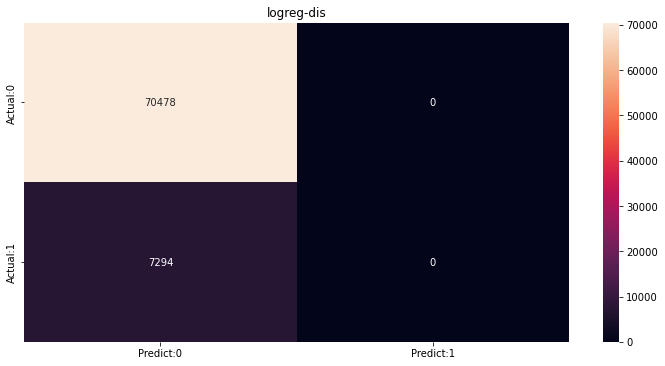

In [46]:
experiment = "logreg-dis"
features = ["shotDistance"]
label_column = "isGoal"

## Splitting X and Y
val_ratio = 0.25
X,y = XY(df_exp,label_column,features)
Xtrain, Xval, Ytrain, Yval = train_test_split(X, y,stratify=y,test_size=val_ratio)

# Xtrain,Ytrain = XY(train_df,label_column,features)
# Xval,Yval = XY(val_df,label_column,features)

## Training
clf = LogisticRegression()
clf.fit(Xtrain, Ytrain)
y_pred_val  = clf.predict(Xval)
y_pred_val_scores = clf.predict_proba(Xval)[:,1]

plot_metrics.plotConfusion(Yval,y_pred_val,title=experiment)

predscore_val_dict[experiment]={}
predscore_val_dict[experiment]['val']=Yval
predscore_val_dict[experiment]['predscore']=y_pred_val_scores

## Dumping model
filename=f"{weights_dir}/{experiment}-yearvalidation.pkl"
joblib.dump(clf,filename)

## logreg-angle

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     70478
           1       0.00      0.00      0.00      7294

    accuracy                           0.91     77772
   macro avg       0.45      0.50      0.48     77772
weighted avg       0.82      0.91      0.86     77772



C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

['../ift6758/models/weights//logreg-angle-yearvalidation.pkl']

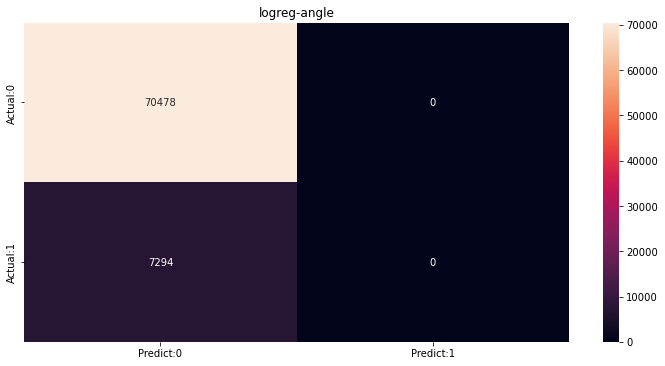

In [23]:
experiment = "logreg-angle"
features = ["shotAngle"]
label_column = "isGoal"

## Splitting X and Y
val_ratio = 0.25
X,y = XY(df_exp,label_column,features)
Xtrain, Xval, Ytrain, Yval = train_test_split(X, y,stratify=y,test_size=val_ratio)

# Xtrain,Ytrain = XY(train_df,label_column,features)
# Xval,Yval = XY(val_df,label_column,features)

## Training
clf = LogisticRegression()
clf.fit(Xtrain, Ytrain)
y_pred_val  = clf.predict(Xval)
y_pred_val_scores = clf.predict_proba(Xval)[:,1]

plot_metrics.plotConfusion(Yval,y_pred_val,title=experiment)

predscore_val_dict[experiment]={}
predscore_val_dict[experiment]['val']=Yval
predscore_val_dict[experiment]['predscore']=y_pred_val_scores



## Dumping model
filename=f"{weights_dir}/{experiment}-yearvalidation.pkl"
joblib.dump(clf,filename)

## logreg-dis-angle

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     70478
           1       0.00      0.00      0.00      7294

    accuracy                           0.91     77772
   macro avg       0.45      0.50      0.48     77772
weighted avg       0.82      0.91      0.86     77772



C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

['../ift6758/models/weights//logreg-dis-angle-yearvalidation.pkl']

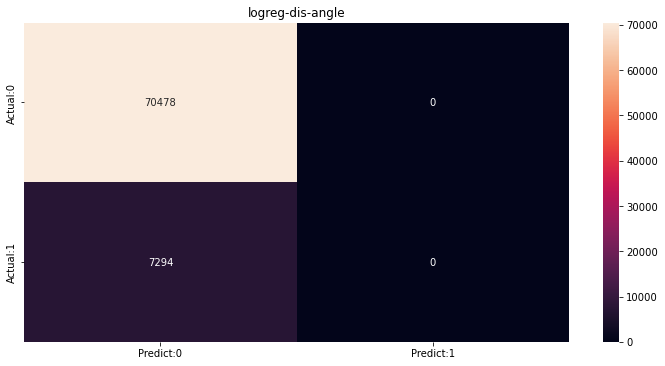

In [24]:
experiment = "logreg-dis-angle"
features = ["shotDistance","shotAngle"]
label_column = "isGoal"

## Splitting X and Y
val_ratio = 0.25
X,y = XY(df_exp,label_column,features)
Xtrain, Xval, Ytrain, Yval = train_test_split(X, y,stratify=y,test_size=val_ratio)

## Training
clf = LogisticRegression()
clf.fit(Xtrain, Ytrain)
y_pred_val  = clf.predict(Xval)
y_pred_val_scores = clf.predict_proba(Xval)[:,1]

plot_metrics.plotConfusion(Yval,y_pred_val,title=experiment)

predscore_val_dict[experiment]={}
predscore_val_dict[experiment]['val']=Yval
predscore_val_dict[experiment]['predscore']=y_pred_val_scores



## Dumping model
filename=f"{weights_dir}/{experiment}-yearvalidation.pkl"
joblib.dump(clf,filename)

* It's always pedicting 0, although about 10% of data is 1
* (Need to explore) Why it's happening (Mostly because the features - diatance,angle values are similar for 1 and 0), and output of predict is 0 or 1 with probability threshold 0.5

## Dummy Classifier

              precision    recall  f1-score   support

           0       0.91      0.50      0.64     70478
           1       0.09      0.50      0.16      7294

    accuracy                           0.50     77772
   macro avg       0.50      0.50      0.40     77772
weighted avg       0.83      0.50      0.60     77772



['../ift6758/models/weights//uniform-sampling-yearvalidation.pkl']

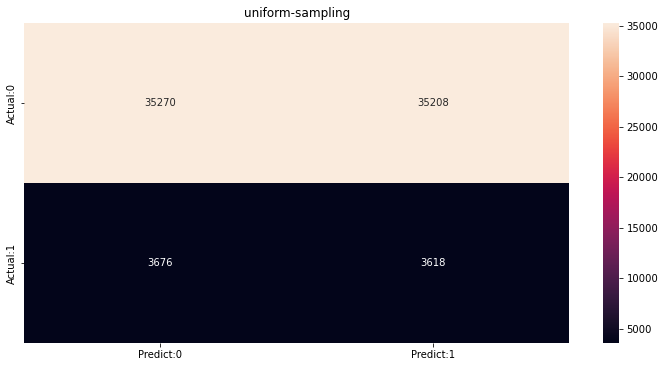

In [25]:
experiment = "uniform-sampling"
features = ["shotDistance"]
label_column = "isGoal"

## Splitting X and Y
val_ratio = 0.25
X,y = XY(df_exp,label_column,features)
Xtrain, Xval, Ytrain, Yval = train_test_split(X, y,stratify=y,test_size=val_ratio)



y_pred_val_scores = np.random.uniform(0,1,Xval.shape[0])
y_pred_val = (y_pred_val_scores>=0.5)
plot_metrics.plotConfusion(Yval,y_pred_val,title=experiment)
comet_exp.log_figure(figure=plt)
predscore_val_dict[experiment]={}
predscore_val_dict[experiment]['val']=Yval
predscore_val_dict[experiment]['predscore']=y_pred_val_scores



## Dumping model
filename=f"{weights_dir}/{experiment}-yearvalidation.pkl"
joblib.dump(clf,filename)

In [26]:
# Yscores[2].shape[0]/(Ytrain.shape[0]+Yscores[2].shape[0])

In [27]:
experiments = predscore_val_dict.keys()
Ytrues=[predscore_val_dict[experiment]['val'] for experiment in experiments]
Yscores=[predscore_val_dict[experiment]['predscore'] for experiment in experiments]
plot_labels=experiments


## ROC_AUC


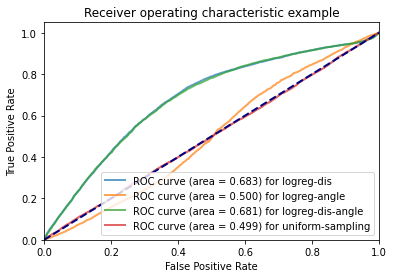

In [28]:
plot_metrics.plot_roc(Ytrues,Yscores,plot_labels)

## Model Percentile

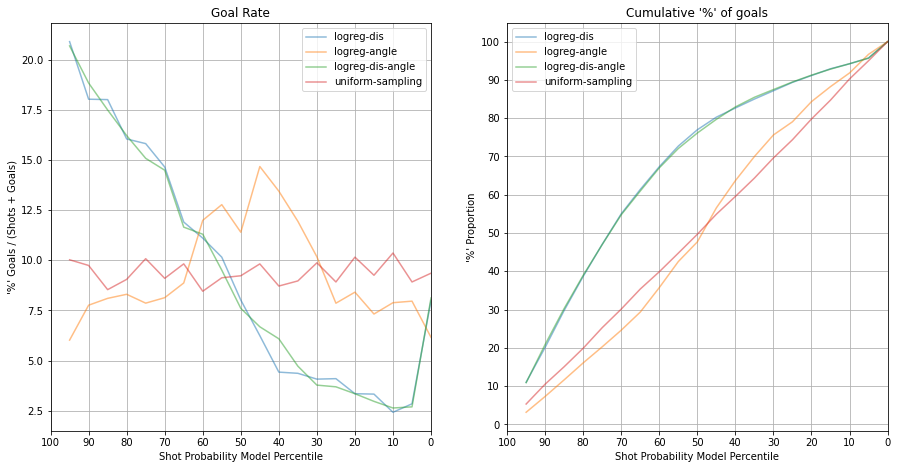

In [30]:
plot_metrics.plot_percentile(Ytrues,Yscores,bin_width=5,plot_labels=plot_labels)

## Calibrarion Curve

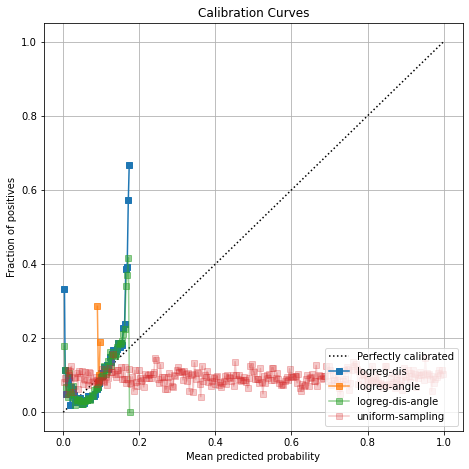

In [31]:
plot_metrics.plot_calibration(Ytrues,Yscores,plot_labels=plot_labels)

In [32]:
experiments

dict_keys(['logreg-dis', 'logreg-angle', 'logreg-dis-angle', 'uniform-sampling'])

In [47]:
comet_exp.log_model("logreg distance validation on 2018", f"{weights_dir}/logreg-dis-yearvalidation.pkl")
comet_exp.log_model("logreg angle validation on 2018", f"{weights_dir}/logreg-angle-yearvalidation.pkl")
comet_exp.log_model("logreg distance angle validation on 2018", f"{weights_dir}/logreg-dis-angle-yearvalidation.pkl")
comet_exp.log_model("logreg uniform sampling validation on 2018", f"{weights_dir}/uniform-sampling-yearvalidation.pkl")
comet_exp.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/morph-e/milestone-2/c3b156c35e22494faaf3e2dd30ea545d
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (740.10 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     model-element            : 4 (4.33 KB)
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
COMET INFO: Waiting for completion of the file uploads (may take several 